In [2]:
import os
from urllib.request import urlretrieve
import zipfile

kitti_data_url = 'https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_image_2.zip'

kitti_data_dir = '/tmp/kitti_dataset'
os.makedirs(kitti_data_dir, exist_ok=True)

zip_file = os.path.join(kitti_data_dir, 'data_object_image_2.zip')
urlretrieve(kitti_data_url, zip_file)

('/tmp/kitti_dataset/data_object_image_2.zip',
 <http.client.HTTPMessage at 0x7ca4ee927460>)

In [3]:
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(kitti_data_dir)

In [4]:
kitti_velodyne_url = 'https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_velodyne.zip'

kitti_data_dir = '/tmp/lidar'
os.makedirs(kitti_data_dir, exist_ok=True)

zip_file = os.path.join(kitti_data_dir, 'data_object_velodyne.zip')
if not os.path.exists(zip_file):
    print(f'Downloading KITTI Velodyne dataset...')
    urlretrieve(kitti_velodyne_url, zip_file)
    print(f'Extracting KITTI Velodyne dataset...')
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(kitti_data_dir)
    print(f'KITTI Velodyne dataset extracted successfully to: {kitti_data_dir}')
else:
    print(f'KITTI Velodyne dataset already exists in: {kitti_data_dir}')

Extracting KITTI Velodyne dataset...
KITTI Velodyne dataset extracted successfully to: /tmp/lidar


In [9]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define directories to inspect
image_training_dir = '/tmp/kitti_dataset/training/image_2'
image_testing_dir = '/tmp/kitti_dataset/testing/image_2'
velodyne_training_dir = '/tmp/lidar/training/velodyne'
velodyne_testing_dir = '/tmp/lidar/testing/velodyne'

# Function to count files and identify data type
def count_and_identify_data(directory, data_type):
    num_files = len(os.listdir(directory))
    return num_files, data_type

# Function to randomly select one file from directory
def get_random_file(directory):
    files = os.listdir(directory)
    return random.choice(files)

# Function to display an image and its respective point cloud
def display_image_and_point_cloud(image_dir, point_cloud_dir):
    # Get random image file
    random_image_file = get_random_file(image_dir)
    image_path = os.path.join(image_dir, random_image_file)

    # Print image file name
    print(f"Image File: {random_image_file}")

    # Read and display image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.title(f"Image: {random_image_file}")
    plt.axis('off')
    plt.show()

    # Get corresponding point cloud file
    point_cloud_file = random_image_file.replace('.png', '.bin')  # Assuming corresponding .bin file
    point_cloud_path = os.path.join(point_cloud_dir, point_cloud_file)

    # Print point cloud file name
    print(f"Point Cloud File: {point_cloud_file}")

    # Read and display point cloud
    pc_data = np.fromfile(point_cloud_path, dtype=np.float32).reshape(-1, 4)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pc_data[:, 0], pc_data[:, 1], pc_data[:, 2], c=pc_data[:, 3], cmap='viridis')
    ax.set_title(f"Point Cloud: {point_cloud_file}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Function to count and display data in directories
def count_and_display_data(image_dir, point_cloud_dir, data_type):
    # Count and identify data
    num_files, data_type = count_and_identify_data(image_dir, data_type)
    print(f"Counting and identifying {data_type}: {num_files}")

    # Display one image and its respective point cloud
    display_image_and_point_cloud(image_dir, point_cloud_dir)

# Main function to execute
if __name__ == "__main__":
    # Display and count from training directories
    print("Displaying and counting from training directories:")
    count_and_display_data(image_training_dir, velodyne_training_dir, 'Training Data')

    # Display and count from testing directories
    print("\nDisplaying and counting from testing directories:")
    count_and_display_data(image_testing_dir, velodyne_testing_dir, 'Testing Data')


Counting and identifying Images (Training) in directory: /tmp/kitti_dataset/training/image_2
    Images (Training): 7481
Counting and identifying Images (Testing) in directory: /tmp/kitti_dataset/testing/image_2
    Images (Testing): 7518
Counting and identifying Velodyne Point Clouds (Training) in directory: /tmp/lidar/training/velodyne
    Velodyne Point Clouds (Training): 7481
Counting and identifying Velodyne Point Clouds (Testing) in directory: /tmp/lidar/testing/velodyne
    Velodyne Point Clouds (Testing): 7518


Displaying and counting from training directories:
Counting and identifying Training Data: 7481
Image File: 000216.png


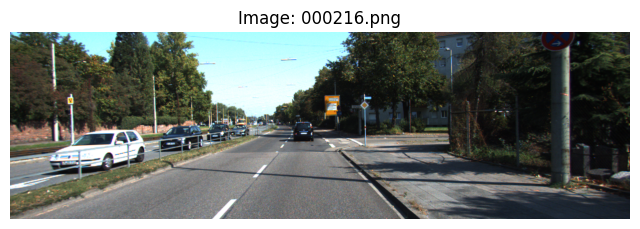

Point Cloud File: 000216.bin


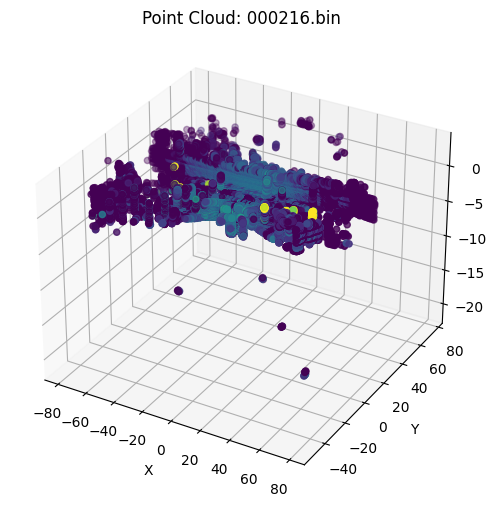


Displaying and counting from testing directories:
Counting and identifying Testing Data: 7518
Image File: 006774.png


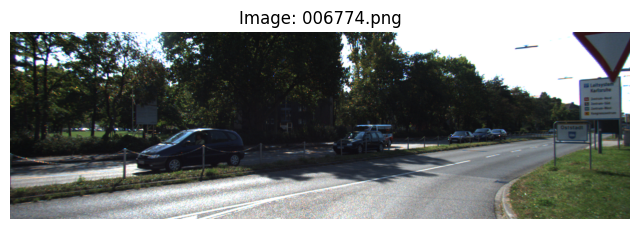

Point Cloud File: 006774.bin


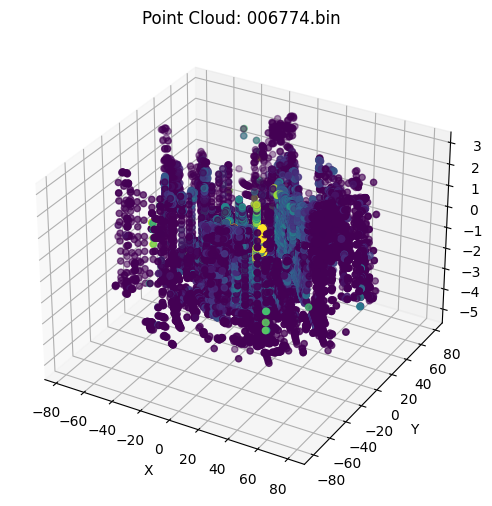

In [14]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define directories to inspect
image_training_dir = '/tmp/kitti_dataset/training/image_2'
image_testing_dir = '/tmp/kitti_dataset/testing/image_2'
velodyne_training_dir = '/tmp/lidar/training/velodyne'
velodyne_testing_dir = '/tmp/lidar/testing/velodyne'

# Function to count files and identify data type
def count_and_identify_data(directory, data_type):
    num_files = len(os.listdir(directory))
    return num_files, data_type

# Function to randomly select one file from directory
def get_random_file(directory):
    files = os.listdir(directory)
    return random.choice(files)

# Function to display an image and its respective point cloud
def display_image_and_point_cloud(image_dir, point_cloud_dir):
    # Get random image file
    random_image_file = get_random_file(image_dir)
    image_path = os.path.join(image_dir, random_image_file)

    # Print image file name
    print(f"Image File: {random_image_file}")

    # Read and display image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.title(f"Image: {random_image_file}")
    plt.axis('off')
    plt.show()

    # Get corresponding point cloud file
    point_cloud_file = random_image_file.replace('.png', '.bin')  # Assuming corresponding .bin file
    point_cloud_path = os.path.join(point_cloud_dir, point_cloud_file)

    # Print point cloud file name
    print(f"Point Cloud File: {point_cloud_file}")

    # Read and display point cloud
    pc_data = np.fromfile(point_cloud_path, dtype=np.float32).reshape(-1, 4)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pc_data[:, 0], pc_data[:, 1], pc_data[:, 2], c=pc_data[:, 3], cmap='viridis')
    ax.set_title(f"Point Cloud: {point_cloud_file}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Function to count and display data in directories
def count_and_display_data(image_dir, point_cloud_dir, data_type):
    # Count and identify data
    num_files, data_type = count_and_identify_data(image_dir, data_type)
    print(f"Counting and identifying {data_type}: {num_files}")

    # Display one image and its respective point cloud
    display_image_and_point_cloud(image_dir, point_cloud_dir)

# Display and count from training directories
print("Displaying and counting from training directories:")
count_and_display_data(image_training_dir, velodyne_training_dir, 'Training Data')

# Display and count from testing directories
print("\nDisplaying and counting from testing directories:")
count_and_display_data(image_testing_dir, velodyne_testing_dir, 'Testing Data')


In [15]:

import os
from urllib.request import urlretrieve
import zipfile

kitti_data_url = 'https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_calib.zip'

kitti_data_dir = '/tmp/calib'
os.makedirs(kitti_data_dir, exist_ok=True)

zip_file = os.path.join(kitti_data_dir, 'data_object_calib.zip')
urlretrieve(kitti_data_url, zip_file)

('/tmp/calib/data_object_calib.zip',
 <http.client.HTTPMessage at 0x7ca4c556a020>)

In [16]:
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(kitti_data_dir)

In [25]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define directories
image_training_dir = '/tmp/kitti_dataset/training/image_2'
image_testing_dir = '/tmp/kitti_dataset/testing/image_2'
velodyne_training_dir = '/tmp/lidar/training/velodyne'
velodyne_testing_dir = '/tmp/lidar/testing/velodyne'
calib_dir = '/tmp/calib'

# Function to load calibration data
def load_calib(calib_dir, split, idx):
    calib_file = os.path.join(calib_dir, split, 'calib', f'{idx:06}.txt')
    with open(calib_file, 'r') as f:
        lines = f.readlines()
    P2 = np.array([float(x) for x in lines[2].strip().split(' ')[1:13]]).reshape(3, 4)
    Tr_velo_to_cam = np.array([float(x) for x in lines[5].strip().split(' ')[1:13]]).reshape(3, 4)
    return P2, Tr_velo_to_cam

# Function to display image and its corresponding point cloud
def display_image_and_point_cloud(image_dir, velodyne_dir, calib_dir, split):
    # Select random file from the directory
    files = sorted(os.listdir(image_dir))
    idx = random.randint(0, len(files) - 1)
    image_file = files[idx]
    image_path = os.path.join(image_dir, image_file)
    velodyne_file = image_file.replace('.png', '.bin')
    velodyne_path = os.path.join(velodyne_dir, velodyne_file)

    # Load calibration data
    P2, Tr_velo_to_cam = load_calib(calib_dir, split, idx)

    # Read image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read point cloud
    velo_points = np.fromfile(velodyne_path, dtype=np.float32).reshape(-1, 4)

    # Project Velodyne points onto image
    velo_points_ext = np.hstack((velo_points[:, :3], np.ones((velo_points.shape[0], 1), dtype=np.float32)))
    velo_points_cam = np.dot(velo_points_ext, np.linalg.inv(Tr_velo_to_cam).T)
    velo_points_cam = np.dot(velo_points_cam, P2.T)
    velo_points_cam = velo_points_cam[:, :2] / velo_points_cam[:, 2, np.newaxis]

    # Plot image and points
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.imshow(image)
    ax.scatter(velo_points_cam[:, 0], velo_points_cam[:, 1], s=1, c=velo_points[:, 3], cmap='viridis')
    ax.set_title(f"Image: {image_file} with Point Cloud")
    ax.axis('off')
    plt.show()

# Display from training and testing sets
print("Displaying from training set:")
display_image_and_point_cloud(image_training_dir, velodyne_training_dir, calib_dir, 'training')

print("\nDisplaying from testing set:")
display_image_and_point_cloud(image_testing_dir, velodyne_testing_dir, calib_dir, 'testing')


Displaying from training set:


LinAlgError: Last 2 dimensions of the array must be square